In [1]:
import pennylane as qml
import matplotlib.pyplot as plt
import numpy as np

In [2]:
qml.drawer.use_style("sketch")

## Turning a Hamiltonian term into a gate

$$
U(H) = e^{-iHt}
$$

### 1) $H_1 = Z$

$$
U = e^{-iZt}
$$

We know $R_Z(\theta) = e^{-i \frac{\theta}{2} Z}$, thus $U = R_Z(2t)$

In [3]:
dev = qml.device("default.qubit", wires=1)

In [22]:
@qml.qnode(dev)
def H_Z(x, t):
    qml.BasisStatePreparation(x, wires=[0])
    qml.RZ(2*t, wires=0)
    return qml.state()

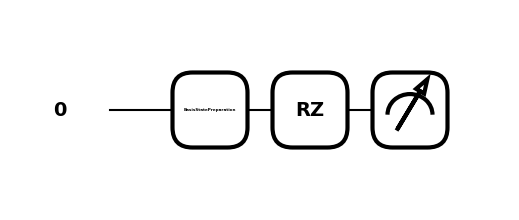

In [23]:
qml.draw_mpl(H_Z)([0], 0)
plt.show()

$$
\begin{aligned}
e^{-iZ\pi}|0\rangle &= e^{-i\pi}|0\rangle = (\cos\pi - i \sin\pi)|0\rangle = -|0\rangle \\
e^{-iZ\pi}|1\rangle &= e^{+i\pi}|1\rangle = (\cos\pi + i \sin\pi)|1\rangle = -|1\rangle
\end{aligned}
$$

In [24]:
H_Z([0], np.pi)

tensor([-1.-1.2246468e-16j,  0.+0.0000000e+00j], requires_grad=True)

In [25]:
H_Z([1], np.pi)

tensor([ 0.+0.0000000e+00j, -1.+1.2246468e-16j], requires_grad=True)

### 2) $H_2 = X$

$$
H Z H = \frac{1}{2} \begin{pmatrix} 1 & 1 \\ 1 & -1 \end{pmatrix} \begin{pmatrix} 1 & 0 \\ 0 & -1 \end{pmatrix} \begin{pmatrix} 1 & 1 \\ 1 & -1 \end{pmatrix} = \frac{1}{2} \begin{pmatrix} 1 & -1 \\ 1 & 1 \end{pmatrix} \begin{pmatrix} 1 & 1 \\ 1 & -1 \end{pmatrix} = \begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix} = X
$$
Thus,
$$
e^{-iXt} = e^{-iHZHt} = H e^{-iZt} H
$$

In [26]:
@qml.qnode(dev)
def H_X(x, t):
    qml.BasisStatePreparation(x, wires=[0])
    qml.Hadamard(wires=0)
    qml.RZ(2*t, wires=0)
    qml.Hadamard(wires=0)
    return qml.state()

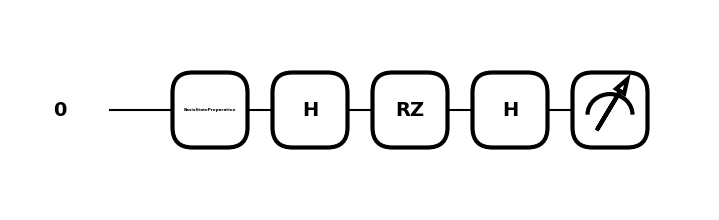

In [28]:
qml.draw_mpl(H_X)([0],0)
plt.show()

$$
\begin{aligned}
He^{-iZt}H|0\rangle &= \frac{1}{\sqrt{2}}He^{-iZt}(|0\rangle + |1\rangle) = \frac{1}{\sqrt{2}}H(e^{-it}|0\rangle + e^{it}|1\rangle) = \frac{1}{2}(e^{-it}(|0\rangle + |1\rangle) + e^{it}(|0\rangle - |1\rangle)) = \frac{e^{it} + e^{-it}}{2}|0\rangle - \frac{e^{it} - e^{-it}}{2}|1\rangle = \cos t|0\rangle -i\sin t|1\rangle \\
He^{-iZt}H|1\rangle &= \frac{1}{\sqrt{2}}He^{-iZt}(|0\rangle - |1\rangle) = \frac{1}{\sqrt{2}}H(e^{-it}|0\rangle - e^{it}|1\rangle) = \frac{1}{2}(e^{-it}(|0\rangle + |1\rangle) - e^{it}(|0\rangle - |1\rangle)) = \frac{e^{it} + e^{-it}}{2}|1\rangle - \frac{e^{it} - e^{-it}}{2}|0\rangle = \cos t|1\rangle -i\sin t|0\rangle
\end{aligned}
$$

In [29]:
H_X([0], np.pi)

tensor([-1.+0.0000000e+00j,  0.-1.2246468e-16j], requires_grad=True)

In [30]:
H_X([0], np.pi/2)

tensor([6.123234e-17+0.j, 0.000000e+00-1.j], requires_grad=True)

In [31]:
H_X([1], np.pi)

tensor([ 0.-1.2246468e-16j, -1.+0.0000000e+00j], requires_grad=True)

In [32]:
H_X([1], np.pi/2)

tensor([0.000000e+00-1.j, 6.123234e-17+0.j], requires_grad=True)

### 3) $H = Z \otimes Z$

$$ e^{-i Z \otimes Z t} = \cos t \mathbb{1} - i \sin t (Z\otimes Z) $$

$$
\begin{aligned}
e^{-i Z\otimes Z t}|00\rangle &= (\cos t - i\sin t)|00\rangle = e^{-it}|00\rangle \\
e^{-i Z\otimes Z t}|01\rangle &= (\cos t + i\sin t)|01\rangle = e^{it}|01\rangle \\
e^{-i Z\otimes Z t}|10\rangle &= (\cos t + i\sin t)|10\rangle = e^{it}|10\rangle \\
e^{-i Z\otimes Z t}|11\rangle &= (\cos t - i\sin t)|11\rangle = e^{-it}|11\rangle
\end{aligned}
$$

- Fix first state, only consider second state : $e^{it}$ or $e^{-it}$ $\Rightarrow$ $e^{-iZt} = R_Z(2t)$
- But different behavior when first state is $0$ or $1$ : $\text{CNOT}$
- But do not change state : Double $\text{CNOT}$

In [33]:
dev2 = qml.device("default.qubit", wires=2)

In [39]:
@qml.qnode(dev2)
def H_ZZ(x, t):
    qml.BasisStatePreparation(x, wires=[0,1])
    qml.CNOT(wires=[0,1])
    qml.RZ(2*t, wires=1)
    qml.CNOT(wires=[0,1])
    return qml.state()

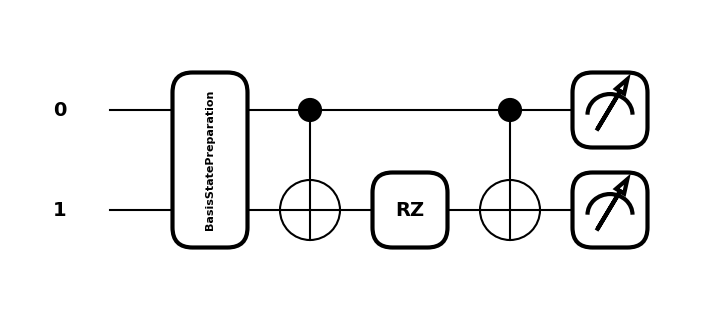

In [40]:
qml.draw_mpl(H_ZZ)([0,0], 0)
plt.show()

In [43]:
H_ZZ([0,0], np.pi/2)

tensor([6.123234e-17-1.j, 0.000000e+00+0.j, 0.000000e+00+0.j,
        0.000000e+00+0.j], requires_grad=True)

In [44]:
H_ZZ([0,1], np.pi/2)

tensor([0.000000e+00+0.j, 6.123234e-17+1.j, 0.000000e+00+0.j,
        0.000000e+00+0.j], requires_grad=True)

In [45]:
H_ZZ([1,0], np.pi/2)

tensor([0.000000e+00+0.j, 0.000000e+00+0.j, 6.123234e-17+1.j,
        0.000000e+00+0.j], requires_grad=True)

In [46]:
H_ZZ([1,1], np.pi/2)

tensor([0.000000e+00+0.j, 0.000000e+00+0.j, 0.000000e+00+0.j,
        6.123234e-17-1.j], requires_grad=True)

## Overlap of Quantum States

### 1) SWAP Test

**Q.** Is a way to extract $|\langle a | b\rangle|^2$ of tensor product state $|a\rangle \otimes |b\rangle = |a\rangle |b\rangle$?

**A.** "Ancilla qubit"

1. $|0\rangle |a\rangle |b\rangle$
2. $(H|0\rangle) |a\rangle |b\rangle = \dfrac{1}{\sqrt{2}}(|0\rangle + |1\rangle) |a\rangle |b\rangle$
3. Apply SWAP gate to $|a\rangle |b\rangle$ when ancilla qubit is $|1\rangle$
4. Apply one more Hadamard gate to ancilla : $\dfrac{1}{2}|0\rangle (|a\rangle |b\rangle + |b\rangle|a\rangle) + \dfrac{1}{2}|1\rangle (|a\rangle |b\rangle - |b\rangle|a\rangle)$
5. Measure ancilla.
   $$ P(|x\rangle = |0\rangle) \equiv p_0 = \frac{1}{4}(\langle a| \langle b| + \langle b|\langle a|)(|a\rangle |b\rangle + |b\rangle|a\rangle) = \frac{1}{4} (1 + \langle a|b\rangle \langle b|a\rangle + \langle b|a\rangle\langle a|b\rangle + 1) = \frac{1}{2} - \frac{1}{2}|\langle a | b\rangle|^2$$
6. Compute $|\langle a | b\rangle|^2 = 1 - 2p_0$

In [50]:
wires = ['a', 'q1', 'q2']
dev3 = qml.device("default.qubit", wires=wires)

In [88]:
@qml.qnode(dev3)
def swap_test_circuit(a, b):
    for x in a:
        x
    for y in b:
        y
    qml.Barrier(wires=wires)
    qml.Hadamard(wires='a')
    qml.CSWAP(wires=wires)
    qml.Hadamard(wires='a')
    return qml.probs(wires='a')

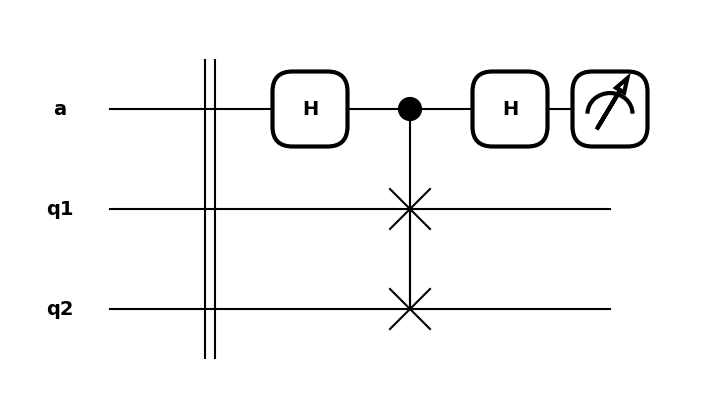

In [89]:
qml.draw_mpl(swap_test_circuit)([qml.Hadamard(wires='q1')], [qml.PauliX(wires='q2'), qml.Hadamard(wires='q2')])
plt.show()

In [90]:
def swap_test(a, b):
    p = swap_test_circuit(a, b)
    return 1. - 2. * p[0]

In [91]:
swap_test([qml.Hadamard(wires='q1')], [qml.PauliX(wires='q2'), qml.Hadamard(wires='q2')])

tensor(-1., requires_grad=True)